In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def regret(x,y,timesteps):
    regret=(timesteps-np.trapz(y,x))/timesteps
    return regret


np.random.seed(3110) # set seed to replicate results

# parameters of our "hidden distribution" of prizes
n_levers = 10
mean = 0
std = 1
q_star = np.random.normal(loc = mean, scale = std, size = n_levers) # true value of the means 


# Greedy choice


In [3]:
def greedy_algorithm_with_first_push(Q,t):
    # try out all possibilities
    if t < len(Q):
        # action selection
        a_idx = t
    # if he has already ran once all the levers, just pick the best one
    else:
        a_idx = np.argmax(Q)
    # return the chosen lever
    return a_idx
def reward_generator(a_idx, q_star, std):
    # for a given choice, the bandit give back a reward extracted from a gaus distrib.
    R = np.random.normal(loc = q_star[a_idx],scale = std) # if size is not specified a scalar is returned
    return R

def update_Q(Q,N,a_idx,R):
    # update the estimate of Q according to what found
    Q[a_idx] = Q[a_idx] + (R - Q[a_idx]) / N[a_idx]
    return Q

def optimal_action_metric(actions, best_action):
    num = np.cumsum(actions == best_action) 
    den = np.arange(1,len(actions)+1,1)
    return num/den

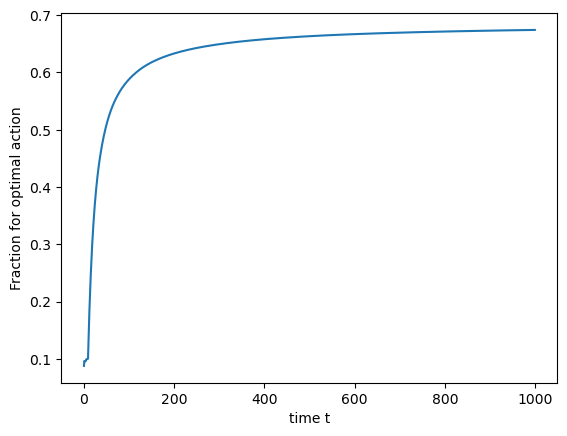

In [4]:
# initialization of Nruns
timesteps = 1000 # for how long the agent must play the bandit
metric_saver_fp = np.zeros(timesteps)
n_runs = 2000

for i in (range(n_runs)):
    # initialization of algorithm (re-extract the bandits every time)
    q_star = np.random.normal(loc = mean, scale = std, size = n_levers) # true value of the means 
    Q = np.zeros(n_levers)
    N = np.zeros(n_levers)
    
    best_action = np.argmax(q_star)
    actions = np.zeros(timesteps) # save the actions
    # loop
    for t in (range(timesteps)):
        a_idx = greedy_algorithm_with_first_push(Q,t)   # pick an action
        N[a_idx] += 1                                   # increase the counter for that action
        R = reward_generator(a_idx,q_star,std)          # generate the reward
        Q = update_Q(Q,N,a_idx,R)                       # update Q
        actions[t] = a_idx
    
    # convert actions array in cumulative times of best action taken
    metric = optimal_action_metric(actions,best_action)
    metric_saver_fp = metric_saver_fp + (metric - metric_saver_fp)/(i+1)
    
plt.plot(np.arange(0,timesteps,1),metric_saver_fp)
plt.xlabel('time t')
plt.ylabel('Fraction for optimal action')
plt.show()

    

# Silly Greedy

In [5]:
def silly_greedy_algorithm(Q,t):
    # find out the value of the max
    a_idx = np.argmax(Q)
    # check if there are more than one == to max
    n_max = np.where(Q == Q[a_idx])[0]
    # if there is only one, that's our man!
    if len(n_max == 1):
        return a_idx
    # if there are ties, we should pick one randomly
    else:
        a_idx = int(len(n_max) * np.random.uniform(0,1))
        return a_idx
    

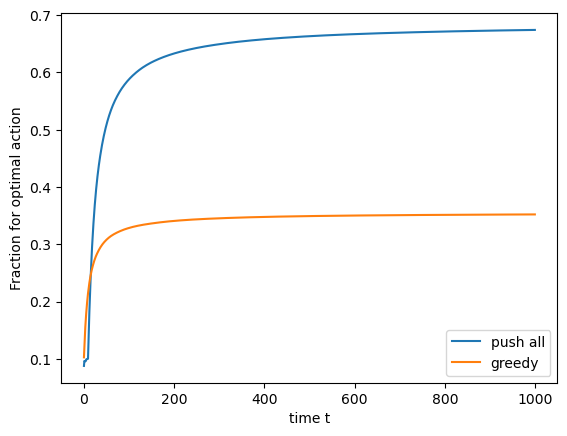

In [6]:
# initialization of Nruns
timesteps = 1000 # for how long the agent must play the bandit
metric_saver_g = np.zeros(timesteps)
n_runs = 2000

for i in (range(n_runs)):
    # initialization of algorithm (re-extract the bandits every time)
    q_star = np.random.normal(loc = mean, scale = std, size = n_levers) # true value of the means 
    Q = np.zeros(n_levers)
    N = np.zeros(n_levers)
    
    best_action = np.argmax(q_star)
    actions = np.zeros(timesteps) # save the actions
    # loop
    for t in (range(timesteps)):
        a_idx = silly_greedy_algorithm(Q,t)   # pick an action
        N[a_idx] += 1                                   # increase the counter for that action
        R = reward_generator(a_idx,q_star,std)          # generate the reward
        Q = update_Q(Q,N,a_idx,R)                       # update Q
        actions[t] = a_idx
    
    # convert actions array in cumulative times of best action taken
    metric = optimal_action_metric(actions,best_action)
    metric_saver_g = metric_saver_g + (metric - metric_saver_g)/(i+1)
    
plt.plot(np.arange(0,timesteps,1),metric_saver_fp, label = 'push all')
plt.plot(np.arange(0,timesteps,1),metric_saver_g, label = 'greedy')
plt.xlabel('time t')
plt.ylabel('Fraction for optimal action')
plt.legend()
plt.show()

    

# $\epsilon$ Greedy 

In [7]:
def epsilon_greedy_algorithm(Q,epsilon):
    # find out the value of the max
    a_idx = np.argmax(Q)
    # extract a number to decide what to do
    dec = np.random.uniform(0,1)
    
    # greedy choice
    if (dec > epsilon):
        # check if there are more than one == to max
        n_max = np.where(Q == Q[a_idx])[0]
        # if there is only one, that's our man!
        if len(n_max == 1):
            return a_idx
        # if there are ties, we should pick one randomly
        else:
            a_idx = int(len(n_max) * np.random.uniform(0,1))
            return a_idx
    # non-greedy choice
    else:
        # possible choices
        pos = np.arange(0,len(Q),1)
        pos = pos[pos != a_idx] # remove the argmax
        a_idx = pos[int(len(pos)*np.random.uniform(0,1))] # pick one random
        return a_idx
        
    

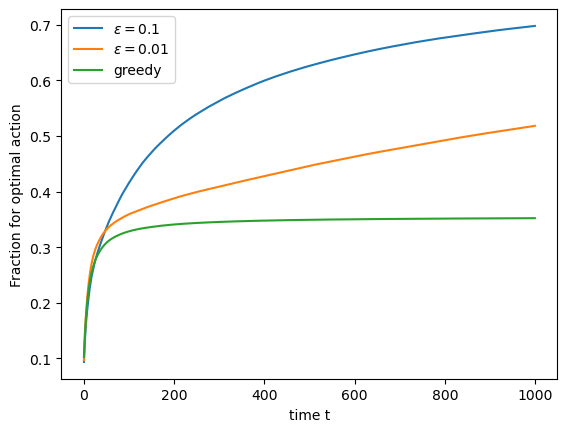

In [8]:
# initialization of Nruns
timesteps = 1000 # for how long the agent must play the bandit
n_runs = 2000
epsilons = [0.1,0.01]
metric_saver_eg_vector=[]

for epsilon in epsilons:
    metric_saver_eg = np.zeros(timesteps)
    for i in (range(n_runs)):
        # initialization of algorithm (re-extract the bandits every time)
        q_star = np.random.normal(loc = mean, scale = std, size = n_levers) # true value of the means 
        Q = np.zeros(n_levers)
        N = np.zeros(n_levers)
        
        best_action = np.argmax(q_star)
        actions = np.zeros(timesteps) # save the actions
        # loop
        for t in (range(timesteps)):
            a_idx = epsilon_greedy_algorithm(Q,epsilon)   # pick an action
            N[a_idx] += 1                                   # increase the counter for that action
            R = reward_generator(a_idx,q_star,std)          # generate the reward
            Q = update_Q(Q,N,a_idx,R)                       # update Q
            actions[t] = a_idx
        
        # convert actions array in cumulative times of best action taken
        metric = optimal_action_metric(actions,best_action)
        metric_saver_eg = metric_saver_eg + (metric - metric_saver_eg)/(i+1)
    metric_saver_eg_vector.append(metric_saver_eg)
    plt.plot(np.arange(0,timesteps,1),metric_saver_eg, label = f'$\epsilon = {epsilon}$')
    
plt.plot(np.arange(0,timesteps,1),metric_saver_g, label = 'greedy')
plt.xlabel('time t')
plt.ylabel('Fraction for optimal action')
plt.legend()
plt.show()

    

# Optimistic Initial Values


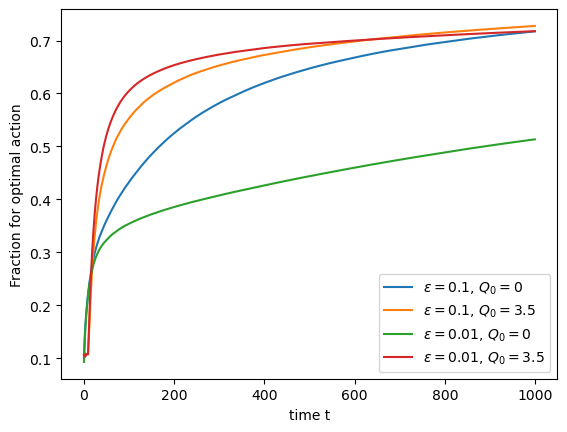

In [9]:
# initialization of Nruns
timesteps = 1000 # for how long the agent must play the bandit
n_runs = 2000
epsilons = [0.1,0.01]
Q_zeros = [0,3.5]
metric_saver_egoiv_vector=[]
for epsilon in epsilons:
    for q_zero in Q_zeros:
        metric_saver_egoiv = np.zeros(timesteps)
        for i in (range(n_runs)):
            # initialization of algorithm (re-extract the bandits every time)
            q_star = np.random.normal(loc = mean, scale = std, size = n_levers) # true value of the means 

            if q_zero == 0:
                Q = np.zeros(n_levers)
            else:
                Q = np.ones(n_levers)*q_zero # optimistic initialization
            N = np.zeros(n_levers)
            
            best_action = np.argmax(q_star)
            actions = np.zeros(timesteps) # save the actions
            # loop
            for t in (range(timesteps)):
                a_idx = epsilon_greedy_algorithm(Q,epsilon)   # pick an action
                N[a_idx] += 1                                   # increase the counter for that action
                R = reward_generator(a_idx,q_star,std)          # generate the reward
                Q = update_Q(Q,N,a_idx,R)                       # update Q
                actions[t] = a_idx
            
            # convert actions array in cumulative times of best action taken
            metric = optimal_action_metric(actions,best_action)
            metric_saver_egoiv = metric_saver_egoiv + (metric - metric_saver_egoiv)/(i+1)
        metric_saver_egoiv_vector.append(metric_saver_egoiv)
            
        plt.plot(np.arange(0,timesteps,1),metric_saver_egoiv, label = f'$\epsilon = {epsilon}$, $Q_0 = {q_zero}$')
#plt.plot(np.arange(0,timesteps,1),metric_saver_g, label = 'greedy')
plt.xlabel('time t')
plt.ylabel('Fraction for optimal action')
plt.legend()
plt.show()

    

# Bayesian K-Armed bandit

In [10]:
def optimal_action_metric(actions, best_action):
    num = np.cumsum(actions == best_action) 
    den = np.arange(1,len(actions)+1,1)
    return num/den

def thompson_sampling(mu_prior, std_prior):
    theta = np.random.normal(mu_prior, std_prior)
    return np.argmax(theta)

def reward_generator(a, q_star, env_std):
    return np.random.normal(q_star[a], env_std)

def update_posterior(mu_prior, std_prior, a, reward, std_like):
    var_prior = std_prior[a]**2
    var_like = std_like**2

    # posterior
    var_post = 1./(1./var_prior + 1./var_like)
    mu_post = var_post*(mu_prior[a]/var_prior+reward/var_like)

    # update
    mu_prior[a] = mu_post
    std_prior[a] = np.sqrt(var_post)

    return mu_prior, std_prior



In [11]:

np.random.seed(3110) # set seed to replicate results

# parameters of our "hidden distribution" of prizes
n_levers = 10

In [12]:
timesteps = 1000
n_runs = 2000

real_mean = 0.0
real_std = 1.0

std_like = 1.0

metric_saver_b = np.zeros(timesteps)

for i in range(n_runs):

    # veri valori delle braccia
    q_star = np.random.normal(real_mean, real_std, size=n_levers)
    best_action = np.argmax(q_star)

    # prior
    Q = np.zeros(n_levers)
    std = np.ones(n_levers) * 10.0

    actions = np.zeros(timesteps)
    for t in range(timesteps):
        a_idx = thompson_sampling(Q, std)
        R = reward_generator(a_idx, q_star, std_like)
        Q, std = update_posterior(Q, std, a_idx, R, std_like)
        actions[t] = a_idx

    metric = optimal_action_metric(actions, best_action)
    metric_saver_b += (metric - metric_saver_b) / (i + 1)
    


In [13]:
bayesian_regret=regret(np.arange(0,timesteps,1), metric_saver_b,timesteps)

In [14]:
bayesian_regret

0.26297252647444497

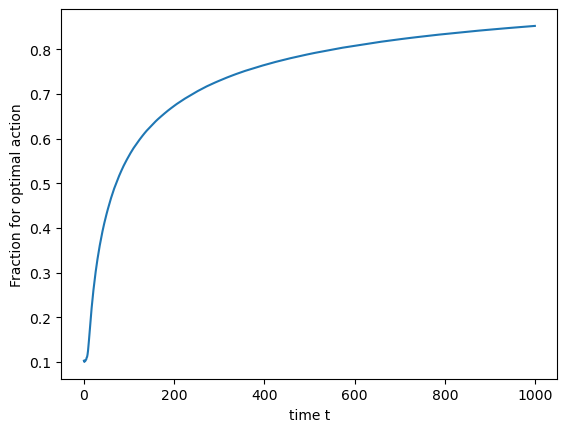

In [15]:
plt.plot(np.arange(0,timesteps,1),metric_saver_b)
plt.xlabel('time t')
plt.ylabel('Fraction for optimal action')
plt.show()


# Regrets

In [16]:
eg_regret=[regret(np.arange(0,timesteps,1), metric_saver_eg_vector[i],timesteps) for i in range(len(metric_saver_eg_vector))]
egoiv_regret=[regret(np.arange(0,timesteps,1), metric_saver_egoiv_vector[i],timesteps) for i in range(len(metric_saver_egoiv_vector))]
bayesian_regret=regret(np.arange(0,timesteps,1), metric_saver_b,timesteps)
greedy_regret=regret(np.arange(0,timesteps,1), metric_saver_fp,timesteps)
silly_regret=regret(np.arange(0,timesteps,1), metric_saver_g,timesteps)

In [28]:
print(f'Greedy: {greedy_regret} \n'
      f'Silly: {silly_regret} \n'
      f'ε-greedy: {eg_regret} \n'
      f'Optimistic Intial Values: {egoiv_regret} \n'
      f'Bayesian: {bayesian_regret}')


Greedy: 0.3639610605978919 
Silly: 0.6585216359813874 
ε-greedy: [0.4145927816940567, 0.564255433659547] 
Optimistic Intial Values: [0.3948977541780831, 0.34712362406602393, 0.567567775846217, 0.33474211376095536] 
Bayesian: 0.26297252647444497
